# Aaron Vo 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

In [3]:
df_raw_order = pd.read_excel("champoo.xlsx", 'Raw Data-Order and Sample')
df_sample_order = pd.read_excel("champoo.xlsx", 'Data on Sample ONLY')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df_raw_order.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,Unnamed: 15,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,1,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,1,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,1,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,1,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,1,71.25


In [5]:
df_sample_order.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [7]:
df_raw_order['QualityName'] = df_raw_order['QualityName'].astype(str)
df_raw_order['DesignName'] = df_raw_order['DesignName'].astype(str)
df_raw_order['ColorName'] = df_raw_order['ColorName'].astype(str)
df_raw_order['ShapeName'] = df_raw_order['ShapeName'].astype(str)
df_raw_order['ITEM_NAME'] = df_raw_order['ITEM_NAME'].astype(str)

In [8]:
# Group by the combination of QualityName, DesignName, ColorName, and ShapeName
classification_features = ['CountryName', 'ITEM_NAME','QualityName', 'DesignName', 'ColorName', 'ShapeName']
numeric_features = ['QtyRequired', 'TotalArea', 'Amount']

top_n = 20
for i in classification_features:
    print(f'Top {top_n} most in {i}')
    print(df_raw_order[i].value_counts().head(top_n))
    print('--------------')
    

Top 20 most in CountryName
USA             10626
INDIA            4135
UK               1694
ITALY             596
ROMANIA           456
BELGIUM           346
AUSTRALIA         311
CANADA            287
LEBANON           168
BRAZIL            165
SOUTH AFRICA       94
CHINA              58
ISRAEL             12
UAE                 4
POLAND              3
Name: CountryName, dtype: int64
--------------
Top 20 most in ITEM_NAME
HAND TUFTED            7095
DURRY                  4355
DOUBLE BACK            2474
HANDWOVEN              2330
KNOTTED                1575
JACQUARD                477
HANDLOOM                357
POWER LOOM JACQUARD     144
GUN TUFTED               91
TABLE TUFTED             42
INDO-TIBBETAN            11
-                         4
Name: ITEM_NAME, dtype: int64
--------------
Top 20 most in QualityName
TUFTED 60C                        1319
TUFTED 60C ALL LOOP                862
TUFTED 60C+VISC 2/16 5PLY          840
TUFTED 60C LOOP/CUT                614
D.B. LI

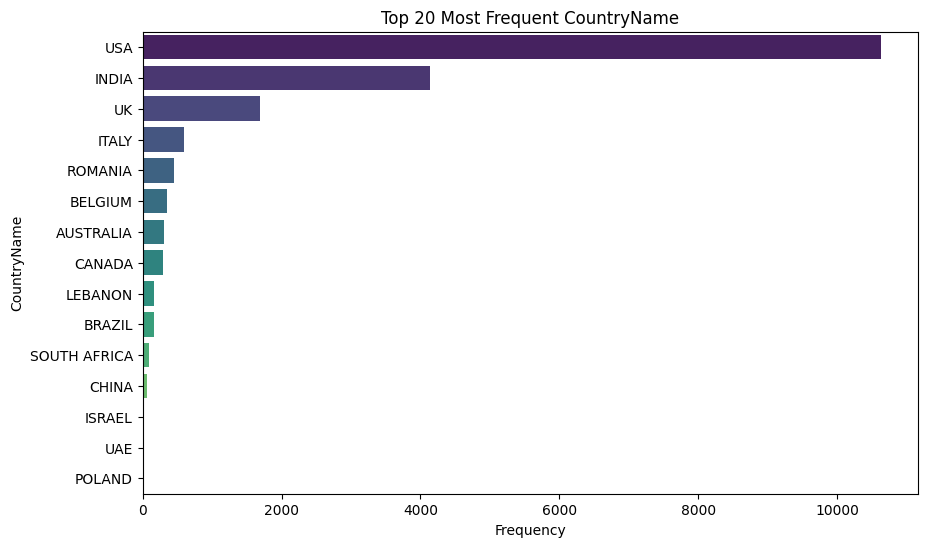

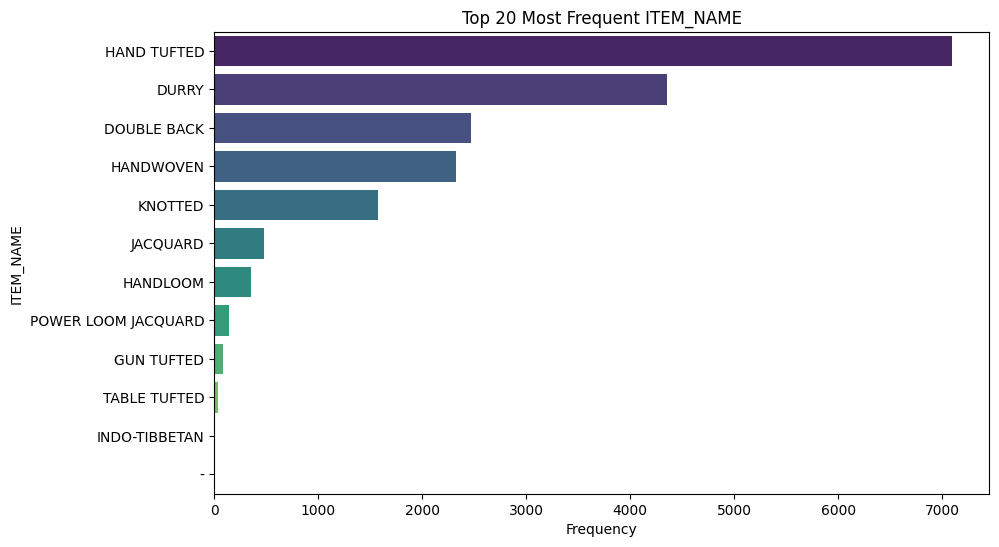

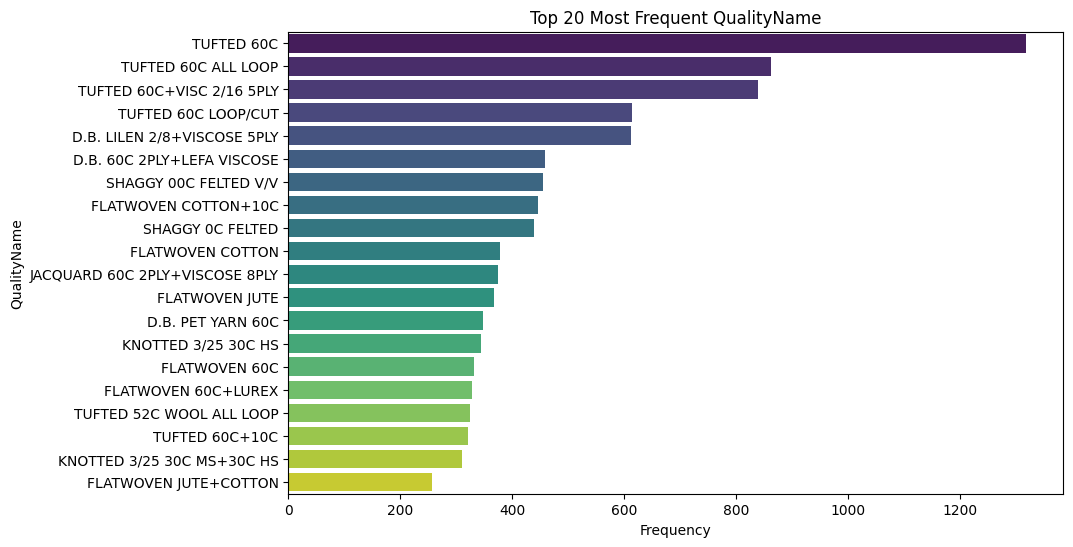

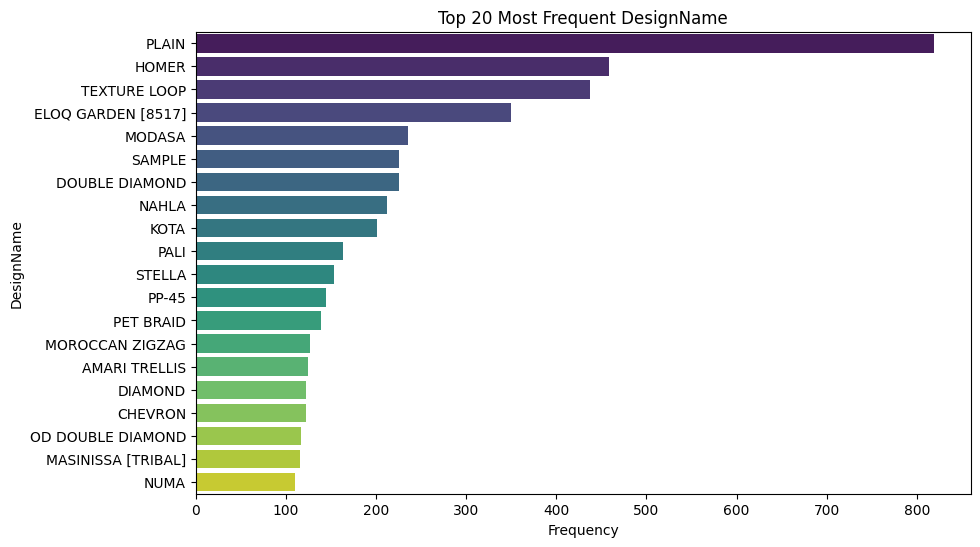

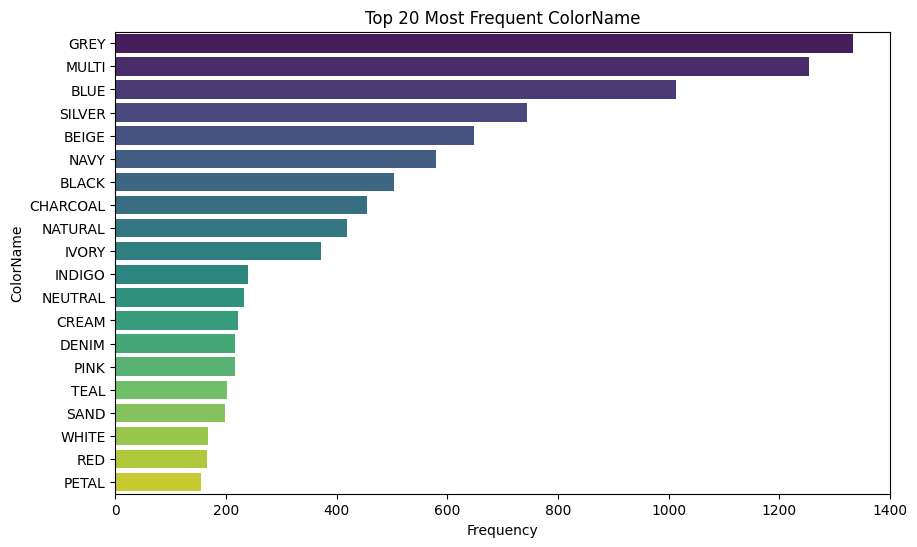

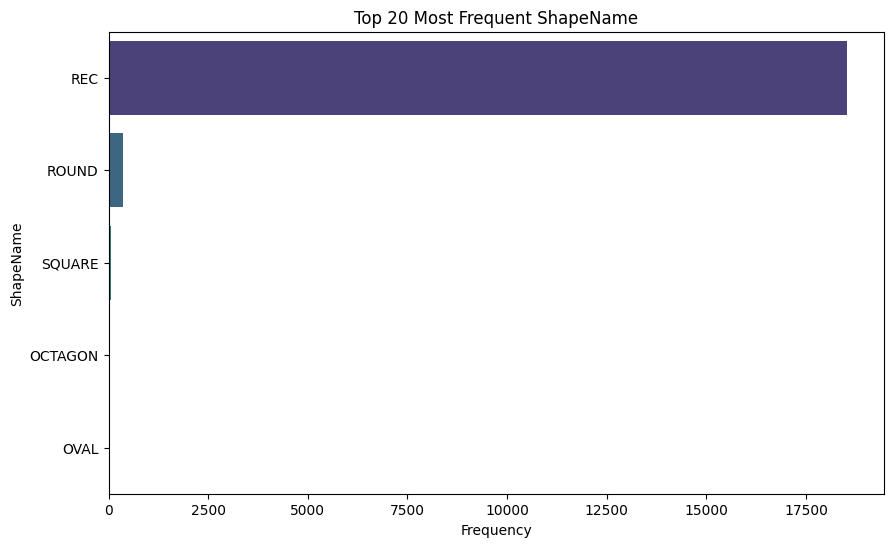

In [9]:
for i in classification_features:
    # Calculate the frequency of each category
    quality_counts = df_raw_order[i].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=quality_counts.values, y=quality_counts.index, palette='viridis')
    plt.title(f'Top {top_n} Most Frequent {i}')
    plt.xlabel('Frequency')
    plt.ylabel(i)
    plt.show()

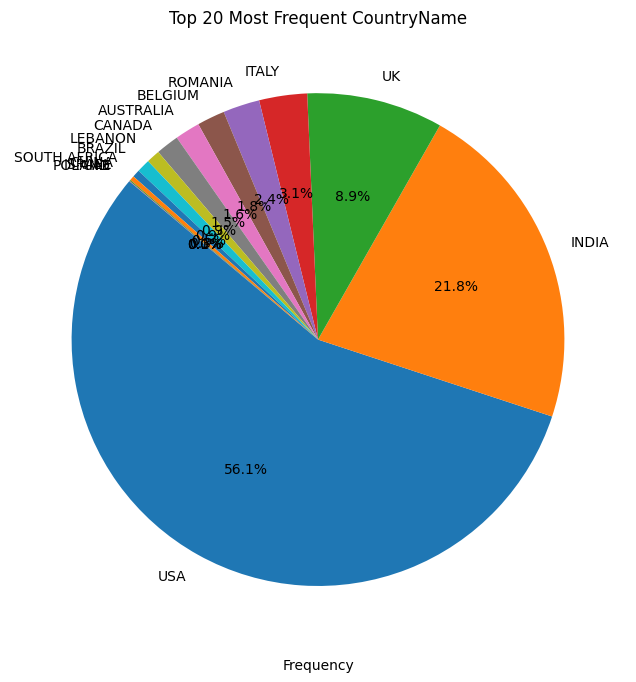

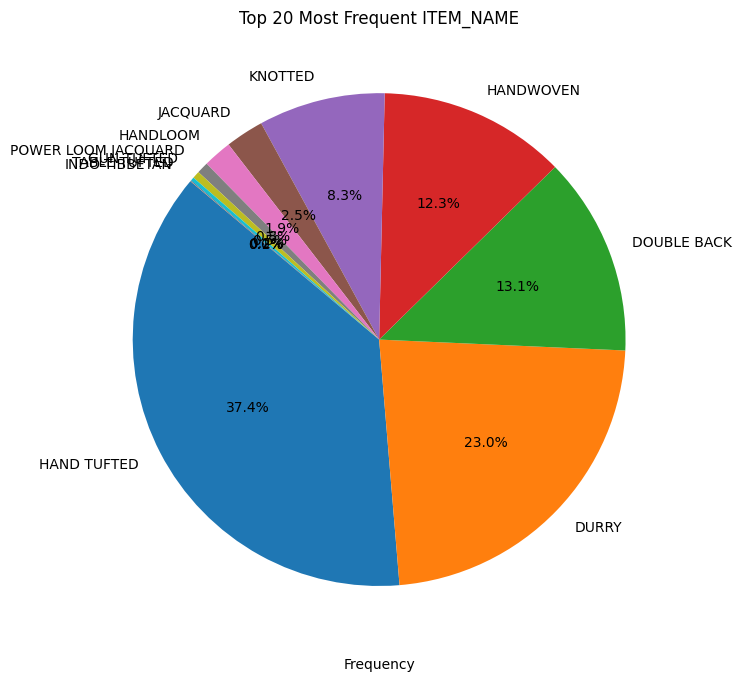

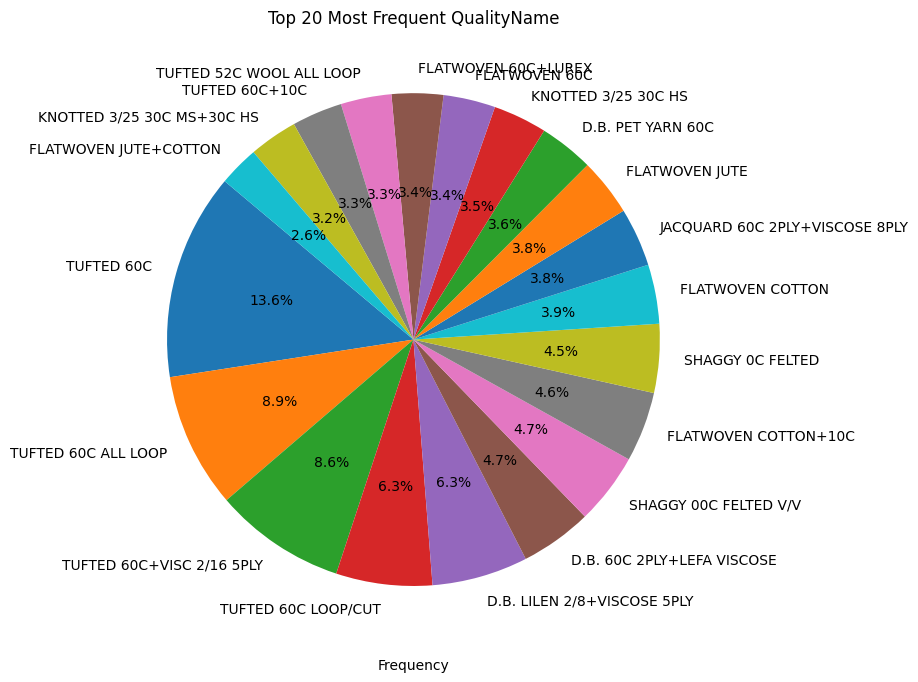

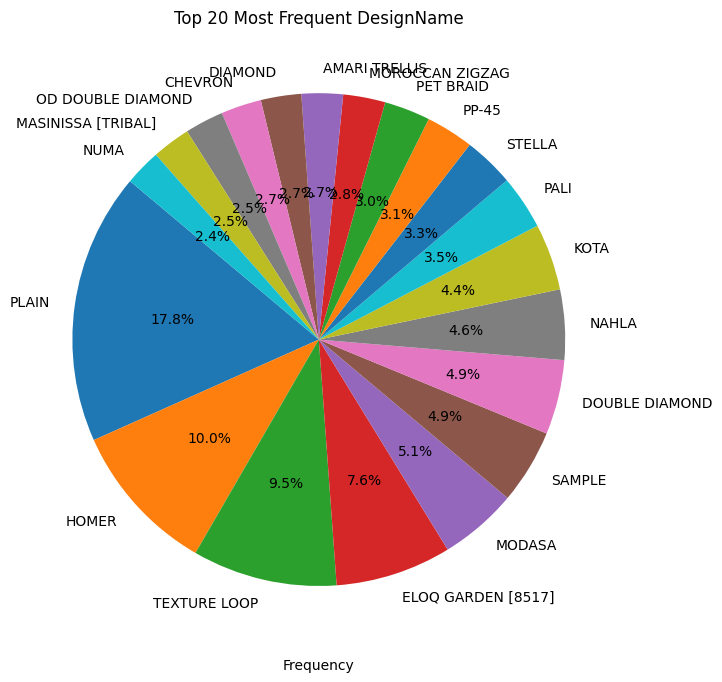

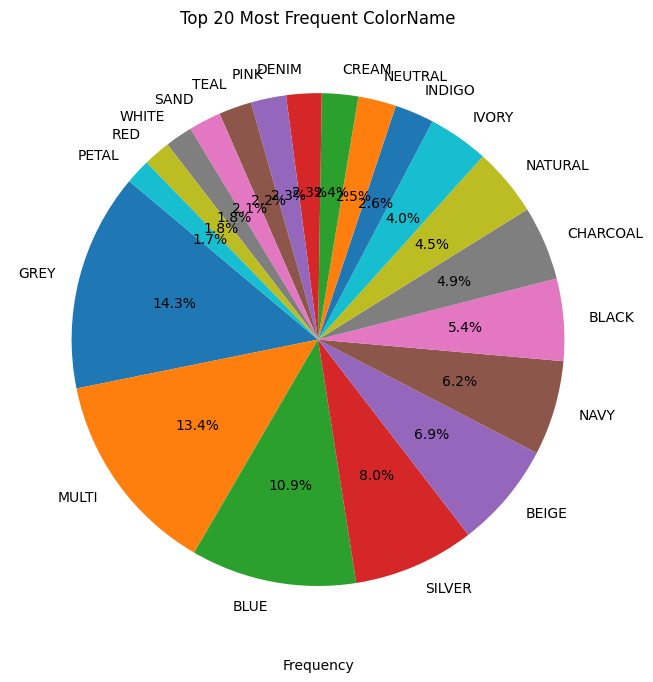

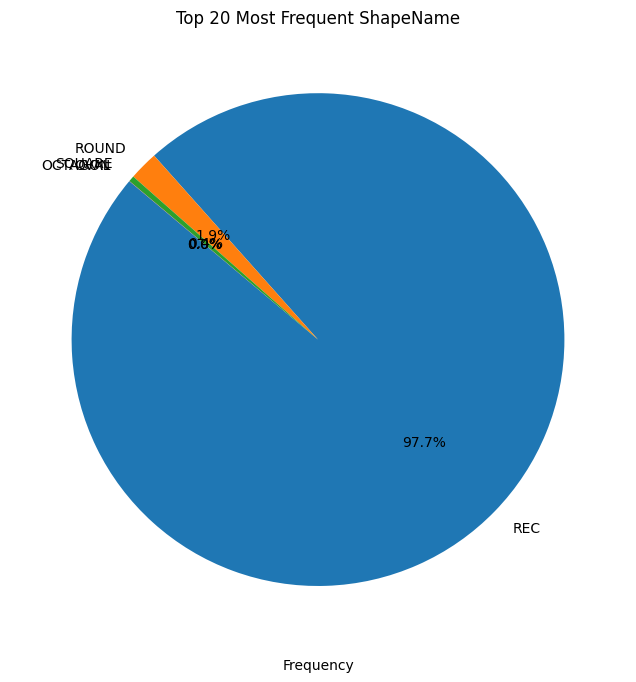

In [10]:
for i in classification_features:
    plt.figure(figsize=(8, 8))
    df_raw_order[i].value_counts().head(top_n).plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {top_n} Most Frequent {i}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

In [11]:
def getTopNFeatureInTopNCountry(featureName, topN):
    top_country = ['USA', 'INDIA', 'UK', 'ITALY', 'ROMANIA', 'BELGIUM']

    for country in top_country:
        country_data = df_raw_order[df_raw_order['CountryName'] == country]

        counts = country_data[featureName].value_counts().head(topN)
        sns.barplot(x=counts.values, y=counts.index, palette='viridis')
        plt.title(f'Top {topN} Most Frequent {featureName} in {country}')
        plt.xlabel('Frequency')
        plt.ylabel(i)
        plt.show()

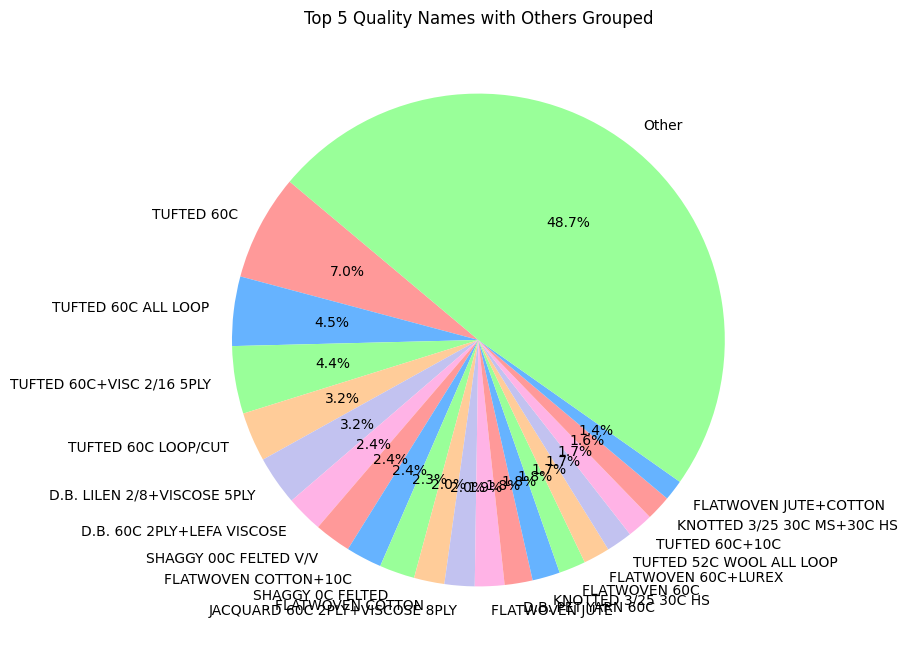

In [12]:
# Count occurrences of each QualityName
quality_counts = df_raw_order['QualityName'].value_counts()

# Get the top 5 categories
top_5 = quality_counts.head(20)

# Sum the rest and add as 'Other'
other_count = quality_counts[20:].sum()
top_5['Other'] = other_count

plt.figure(figsize=(10, 8))
top_5.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#ffb3e6'])
plt.title('Top 5 Quality Names with Others Grouped')
plt.ylabel('')
plt.show()

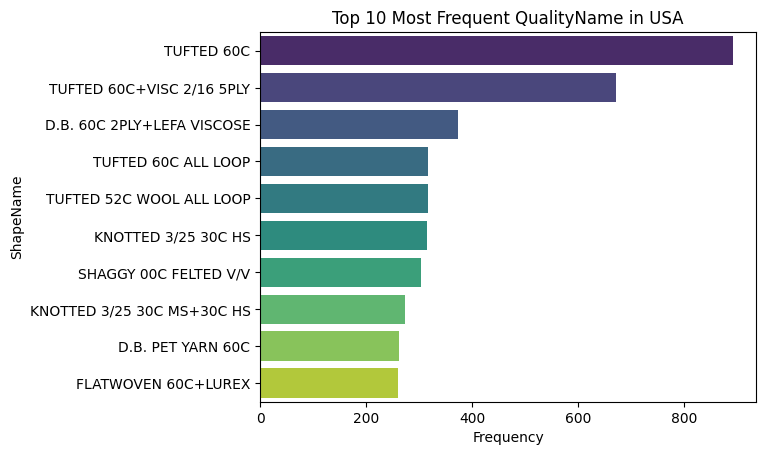

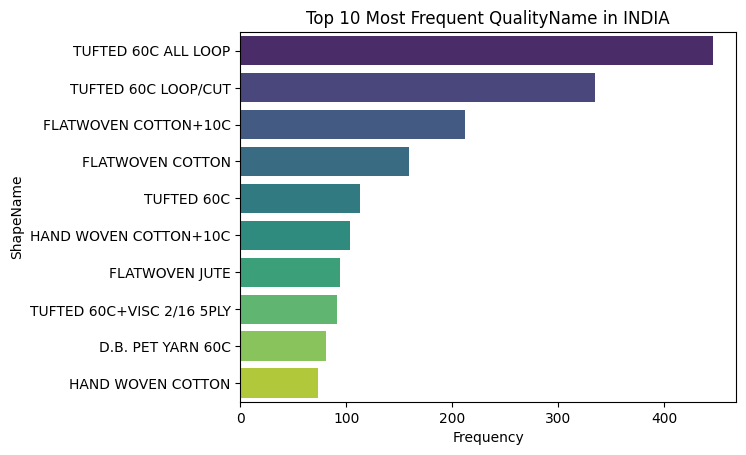

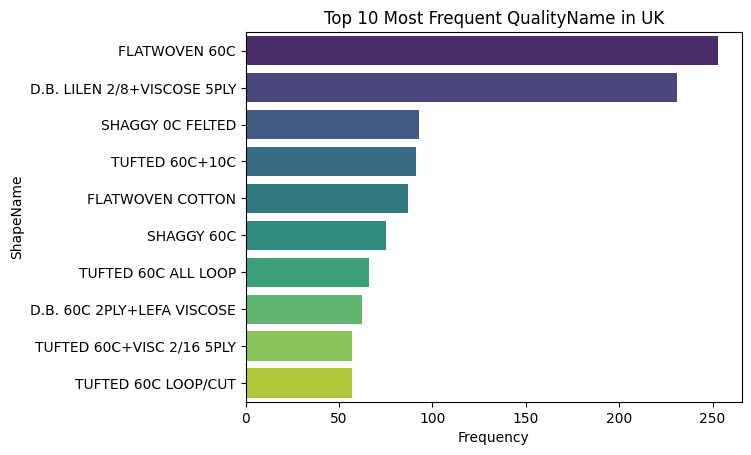

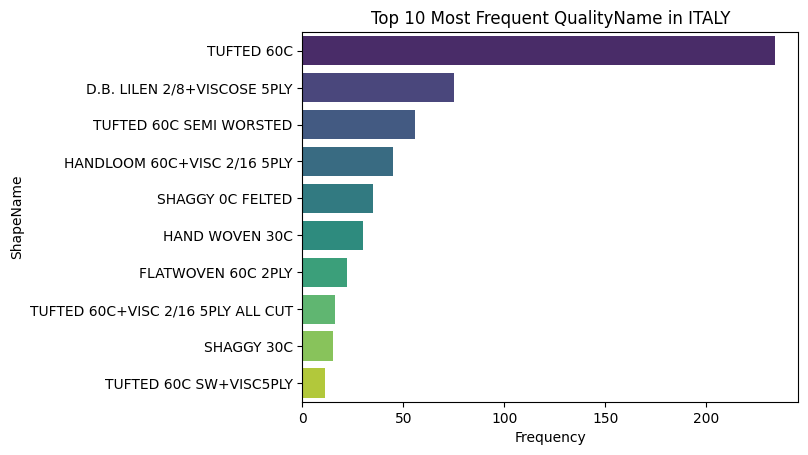

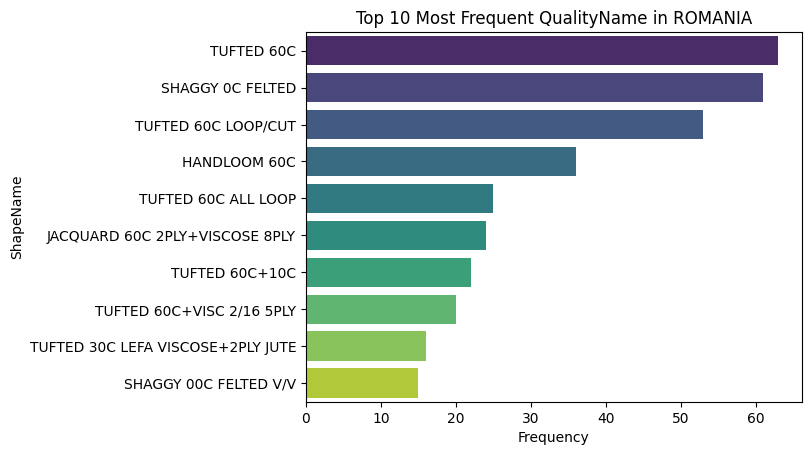

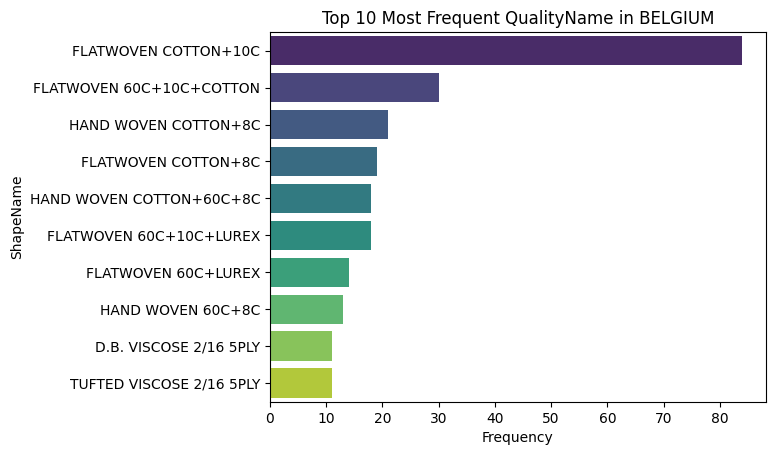

In [13]:
getTopNFeatureInTopNCountry('QualityName', 10)

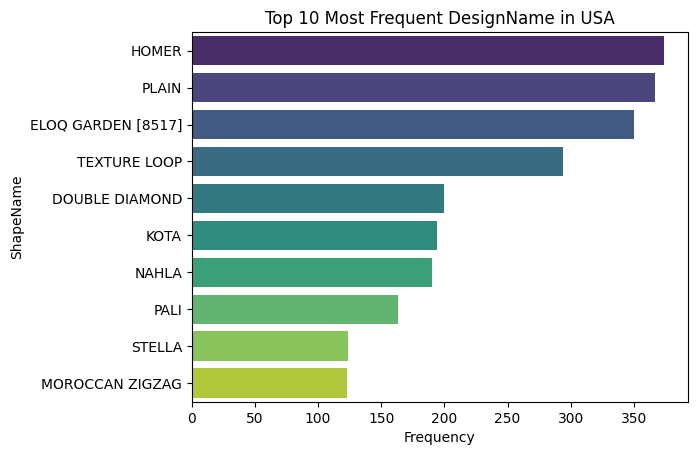

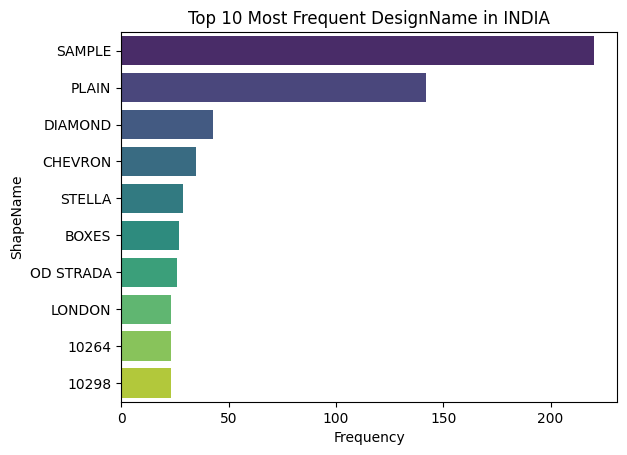

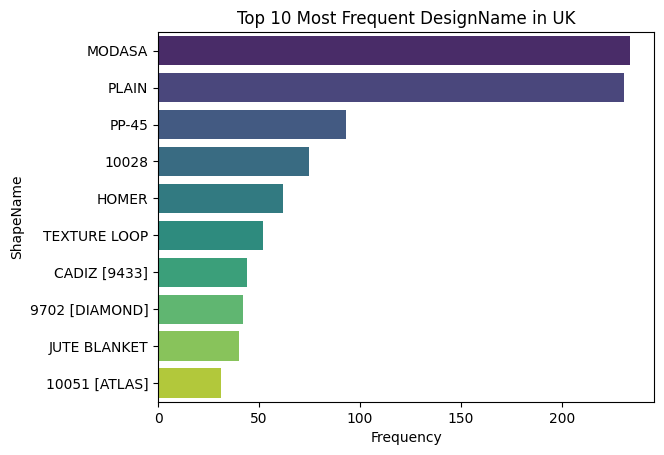

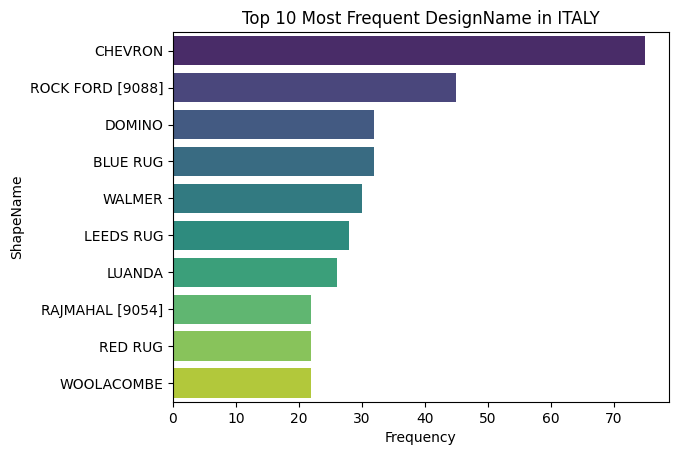

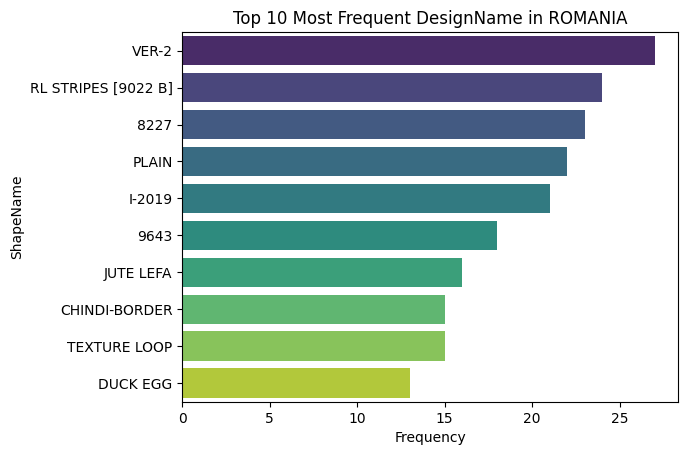

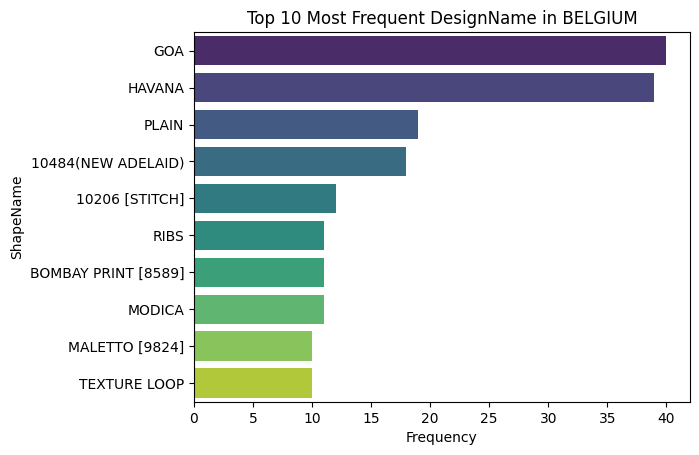

In [14]:
getTopNFeatureInTopNCountry('DesignName', 10)

## 1.1.3. Develop ML models to help identify features that contribute toward conversion (or non-conversion) of samples sent to customers. (You can use Rapid Miner, R, or Python: We recommend Rapid Miner; see instructions to download below.) 

### Decision Trees and Random Forest for Conversion Rate

In [7]:
def getValueCounts(df, column):
    print(df[column].value_counts())

In [8]:
country_code = {
    'INDIA': 1,
    'USA': 2,
    'UK': 3,
    'BELGIUM': 4,
    'ITALY': 5,
    'ROMANIA': 6,
    'CANADA': 7,
    'AUSTRALIA': 8,
    'SOUTH AFRICA': 9,
    'BRAZIL': 10,
    'ISRAEL': 11,
    'POLAND': 12,
    'UAE': 13,
    'CHINA': 14
}

shape_code = {
    'REC': 1,
    'ROUND': 2,
    'SQUARE': 3,
}

df_sample_order['CountryCode'] = df_sample_order['CountryName'].replace(country_code)
df_sample_order['ShapeCode'] = df_sample_order['ShapeName'].replace(shape_code)


getValueCounts(df_sample_order, 'ShapeCode')

df_sample_order_formatted = df_sample_order.drop(['REC', 'Round', 'Square', 'CountryName', 'USA', 'UK', 'Italy', 'Belgium', 'Romania', 'Australia', 'India', 'QtyRequired', 'AreaFt', 'ShapeName', 'ITEM_NAME', 'CustomerCode'], axis=1)

df_sample_order_formatted.head()

1    5741
2      57
3      22
Name: ShapeCode, dtype: int64


,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,Order Conversion,CountryCode,ShapeCode
0,1,0,0,0,0,0,0,0,1,1,1
1,1,0,0,0,0,0,0,0,1,2,1
2,1,0,0,0,0,0,0,0,1,2,1
3,1,0,0,0,0,0,0,0,1,2,1
4,1,0,0,0,0,0,0,0,1,2,1


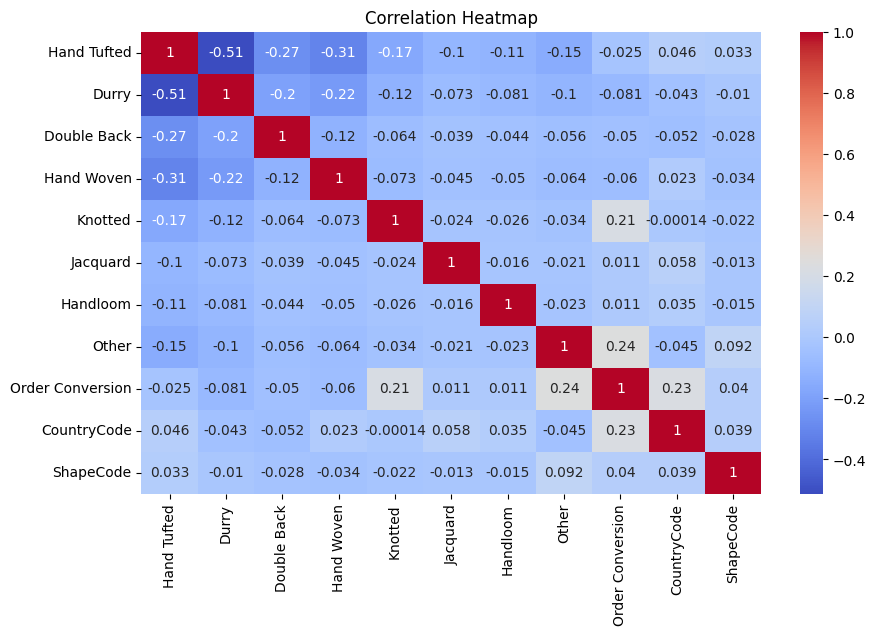

In [9]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_sample_order_formatted.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df_sample_order_formatted['Order Conversion'].value_counts()

0    4651
1    1169
Name: Order Conversion, dtype: int64

In [13]:
df_majority = df_sample_order_formatted[df_sample_order_formatted['Order Conversion'] == 0]
df_minority = df_sample_order_formatted[df_sample_order_formatted['Order Conversion'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced['Order Conversion'].value_counts())

0    1169
1    1169
Name: Order Conversion, dtype: int64


In [14]:
X = df_balanced.drop('Order Conversion', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, df_balanced['Order Conversion'], test_size = 0.2, random_state = 5)

In [15]:
clf = DecisionTreeClassifier(random_state=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

#### Decision Tree

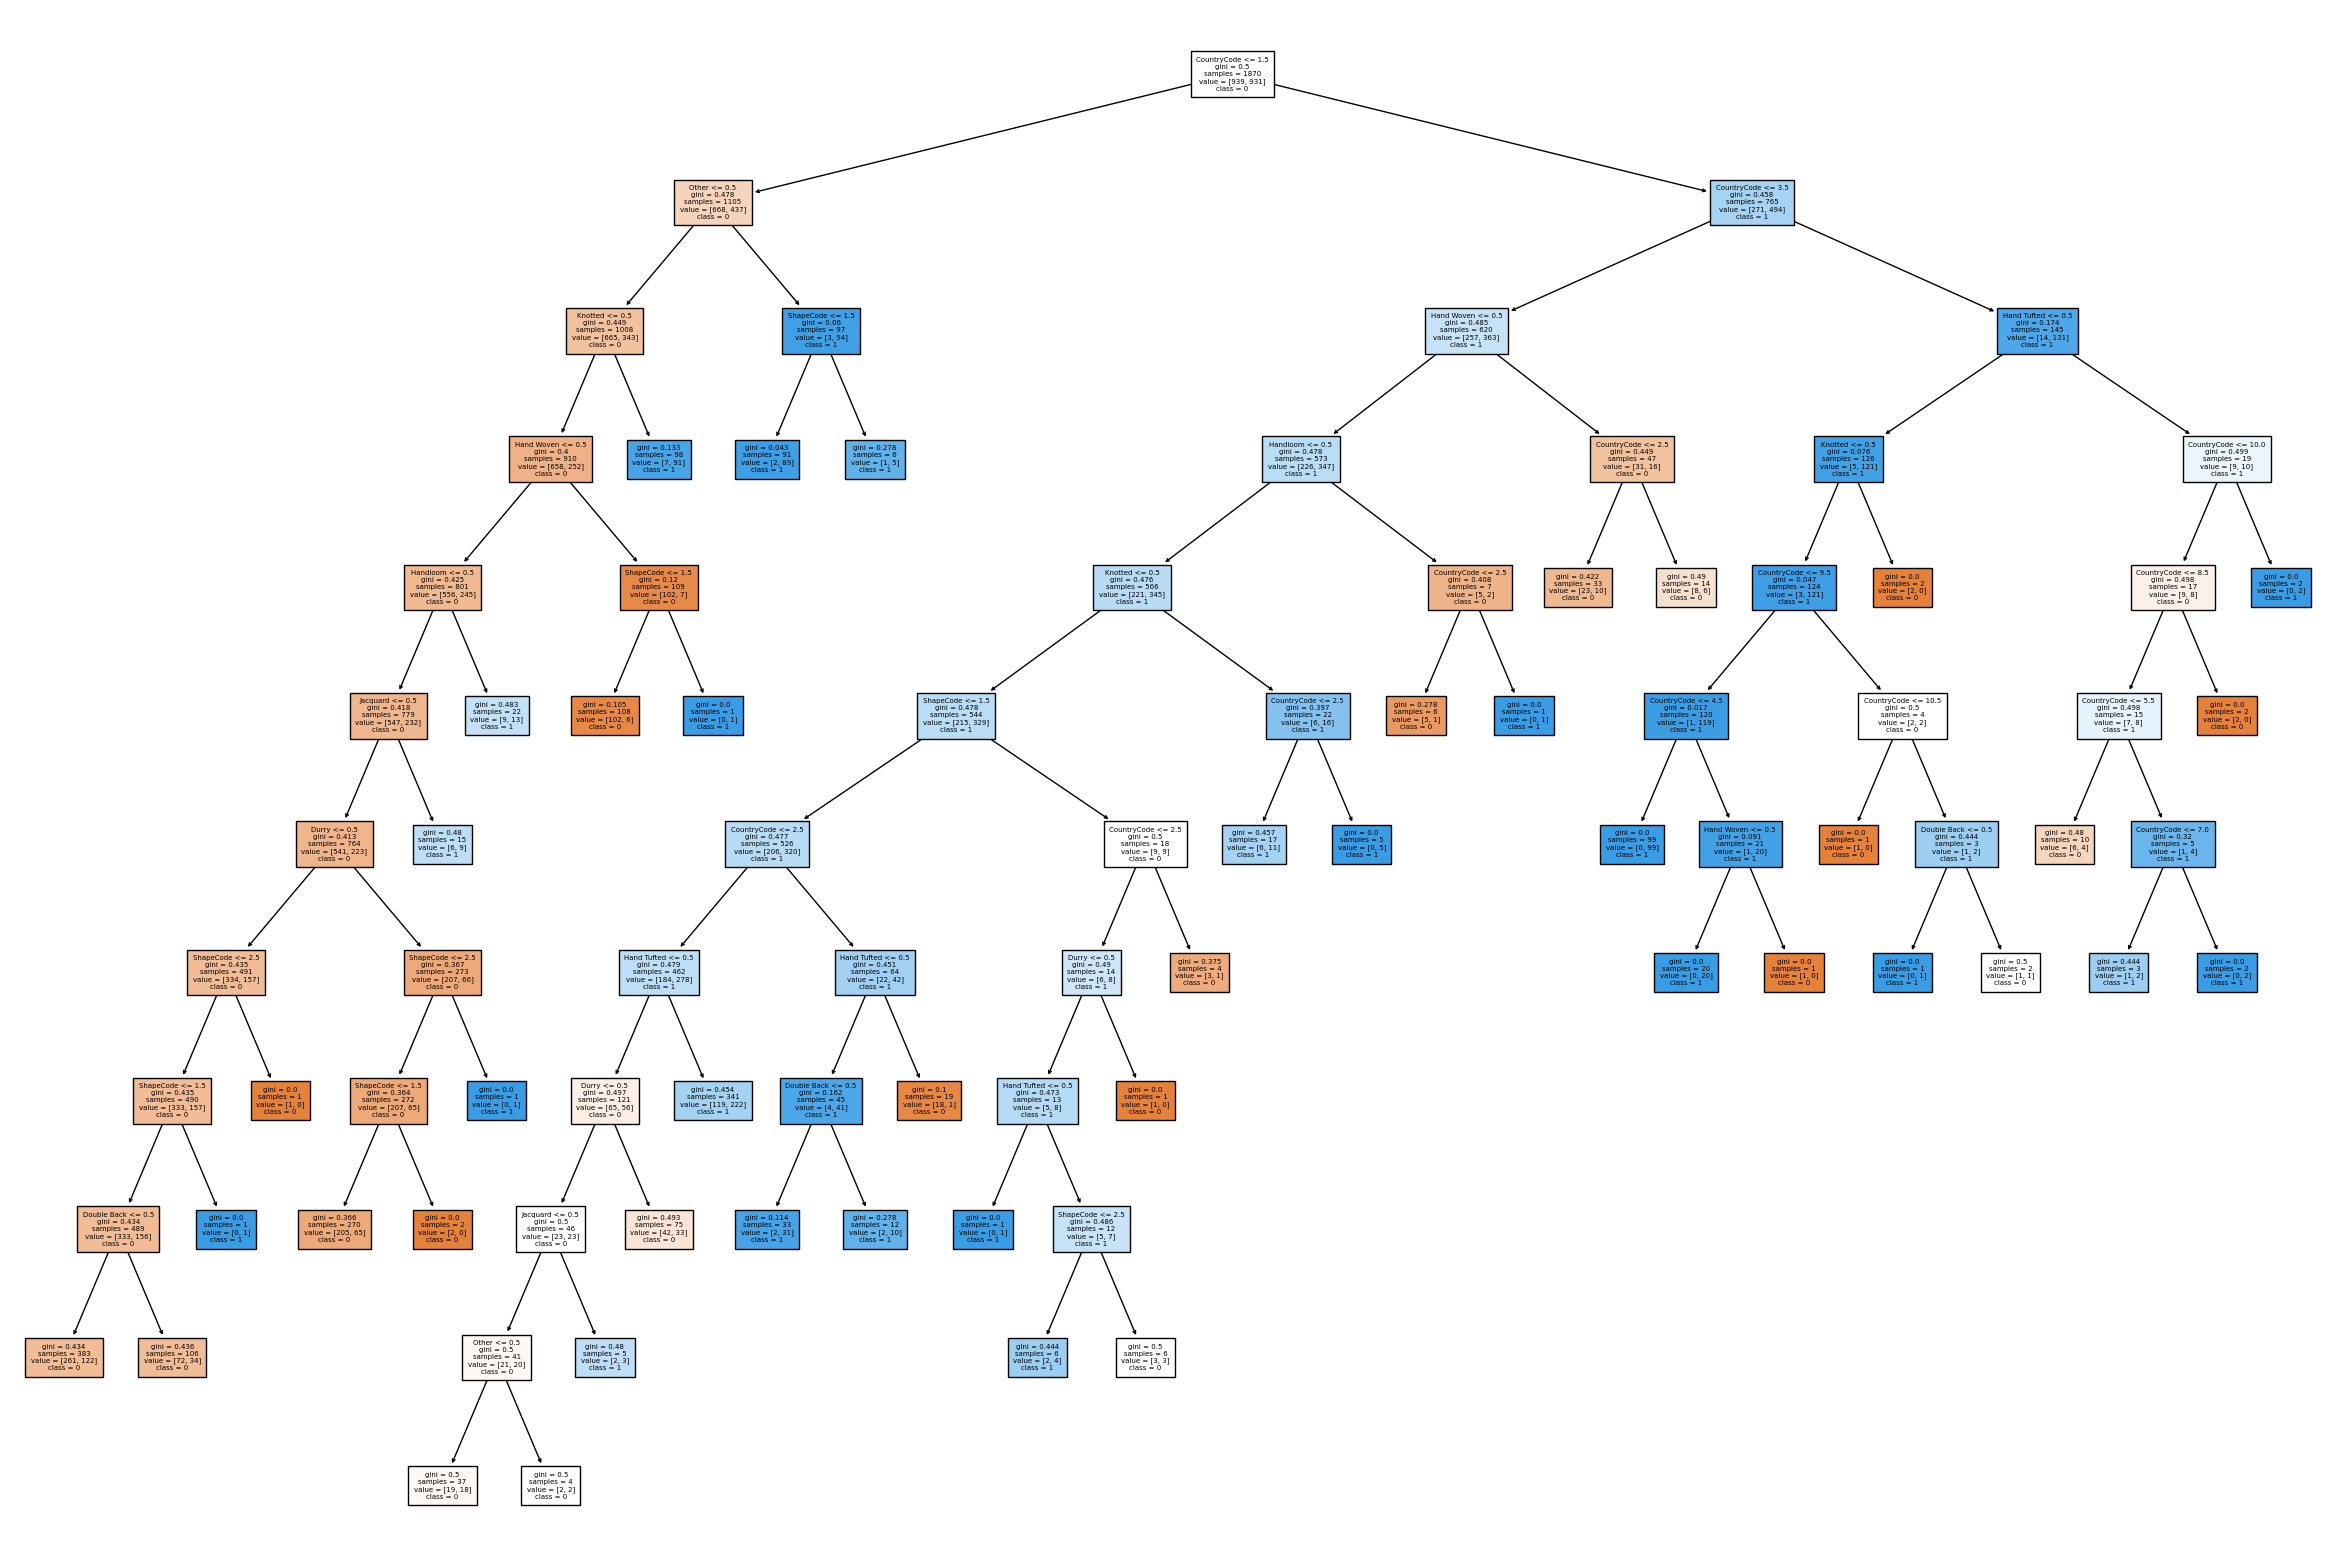

In [16]:
plt.figure(figsize = (30, 20))
plot_tree(clf, filled = True, feature_names = X_train.columns, class_names = list(map(str, clf.classes_)), fontsize = 5)
plt.show()

Best Parameters: {'max_leaf_nodes': 10}


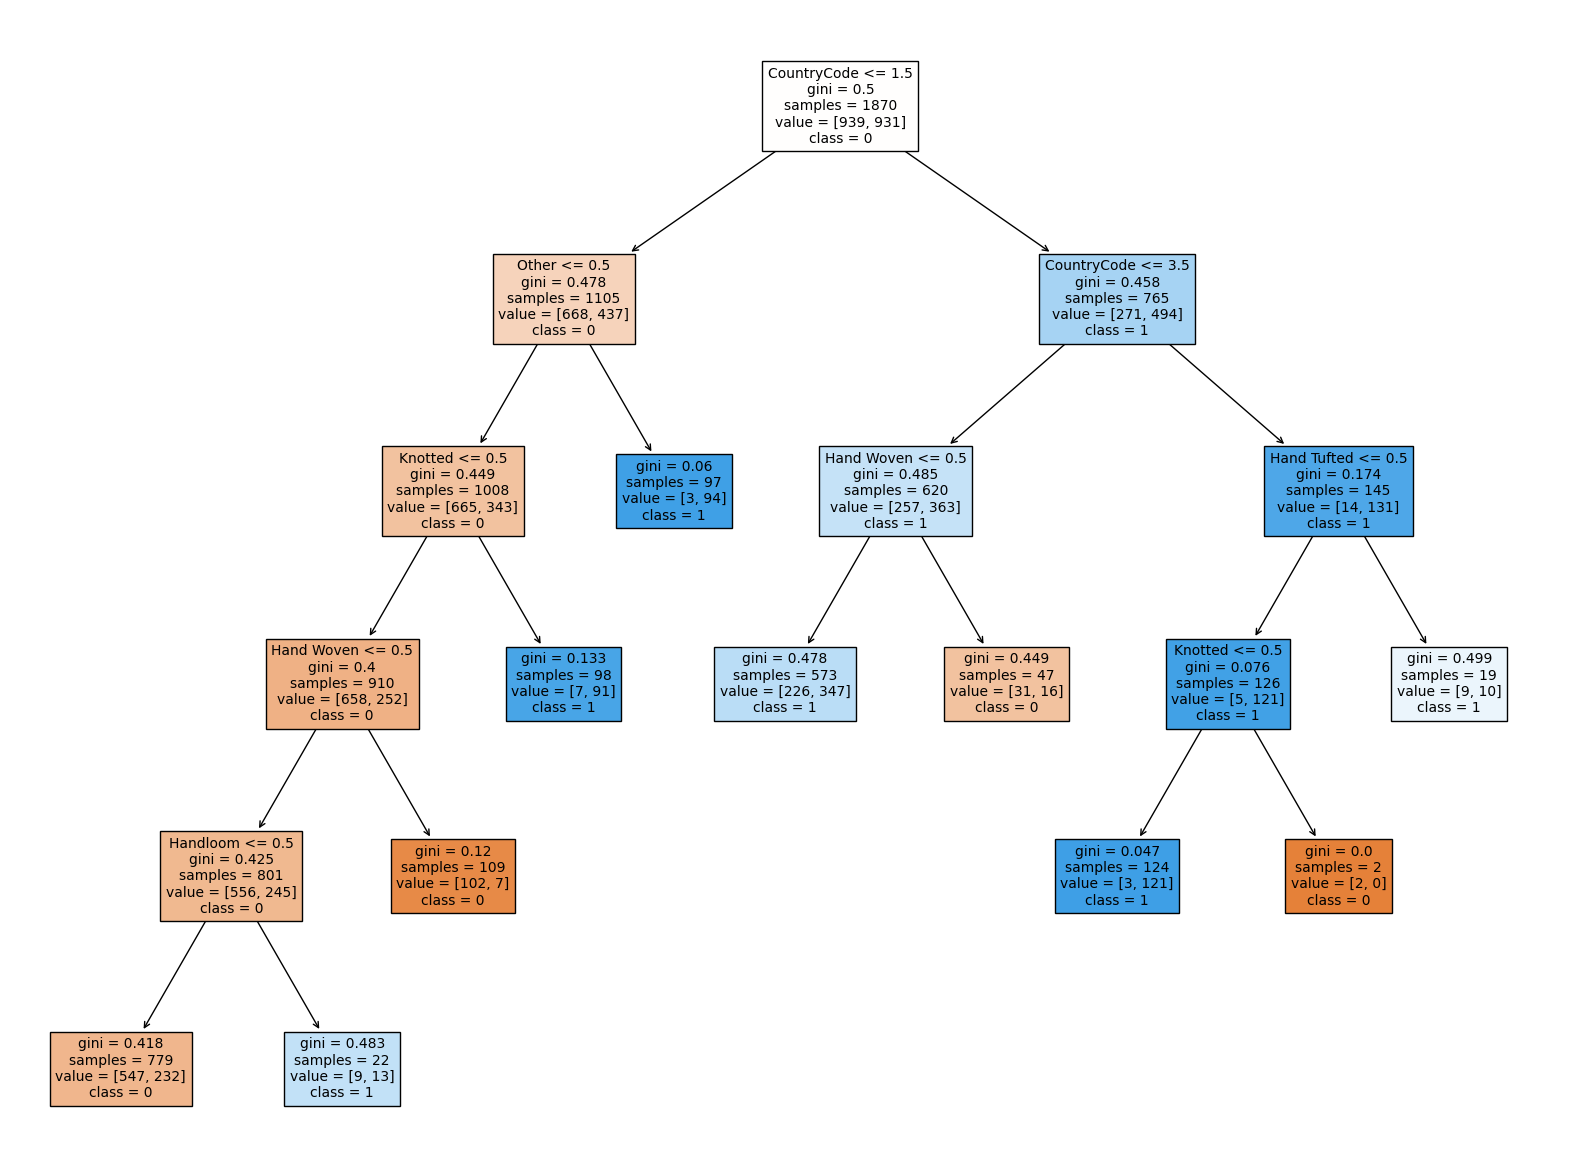

In [17]:
param_grid = {'max_leaf_nodes': [5, 10, 15, 20, 25]}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_classifier = grid_search.best_estimator_

plt.figure(figsize = (20, 15))
plot_tree(best_classifier, filled = True, feature_names = X_train.columns, class_names=list(map(str, best_classifier.classes_)), fontsize=10)
plt.show()

In [18]:
y_pred = best_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       230
           1       0.74      0.76      0.75       238

    accuracy                           0.74       468
   macro avg       0.74      0.74      0.74       468
weighted avg       0.74      0.74      0.74       468



In [21]:
def printConfusionMatrix(y_test,y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    percent_survivors_correct = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    percent_fatalities_correct = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

    print(f"Percent conversion correctly Predicted: {percent_survivors_correct:.2%}")
    print(f"Percent no conversion correctly Predicted: {percent_fatalities_correct:.2%}")

In [22]:
printConfusionMatrix(y_test, y_pred)

Percent conversion correctly Predicted: 72.17%
Percent no conversion correctly Predicted: 76.05%


In [23]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=5, max_leaf_nodes = 10)
rf_clf.fit(X_train, y_train)
rd_predict = rf_clf.predict(X_test)
print(classification_report(y_test, rd_predict))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       230
           1       0.74      0.74      0.74       238

    accuracy                           0.74       468
   macro avg       0.74      0.74      0.74       468
weighted avg       0.74      0.74      0.74       468



### K Means Clustering

In [56]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, classification_features)
    ])

# Pipeline with preprocessing and K-means clustering
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', KMeans(n_clusters=
                                             5, random_state=5))])

# Fit pipeline
pipeline.fit(df_raw_order[['ITEM_NAME','CountryName', 'QualityName', 'DesignName', 'ColorName', 'ShapeName', 'QtyRequired', 'TotalArea', 'Amount']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['QtyRequired', 'TotalArea',
                                                   'Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CountryName', 'ITEM_NAME',
                                                   'QualityName', 'DesignName',
                                                   'ColorName',
                                                   'ShapeName'])])),
                ('kmeans', KMeans(n_clusters=5, random_state=5))])

In [59]:
# Assign cluster labels to original data
df_raw_order['Cluster'] = pipeline['kmeans'].labels_

first_order_cluster = df_raw_order.iloc[0]['Cluster']
similar_orders = df_raw_order[df_raw_order['Cluster'] == first_order_cluster]

print(f"Similar Orders:\n{similar_orders}")

# Example: Predict cluster for new data (e.g., new order)
new_order = pd.DataFrame({
    'CountryName': 'USA',
    'QtyRequired': [3],
    'TotalArea': [10],
    'Amount': [20],
    'QualityName': ['TUFTED 30C HARD TWIST'],
    'DesignName': ['OLD LONDON [3715]'],
    'ColorName': ['BEIGE'],
    'ShapeName': ['REC'],
    'ITEM_NAME': 'HAND TUFTED'
})

predicted_cluster = pipeline.predict(new_order)

print(f"Predicted Cluster for New Order: {predicted_cluster[0]}")

Similar Orders:
       OrderType OrderCategory CustomerCode CountryName CustomerOrderNo  \
0      Area Wise         Order          H-1         USA         1873354   
1      Area Wise         Order          H-1         USA         1873354   
2      Area Wise         Order          H-1         USA         1873354   
3      Area Wise         Order          H-1         USA         1918436   
8      Area Wise         Order          H-1         USA         1873354   
...          ...           ...          ...         ...             ...   
18950  Area Wise        Sample          T-2       ITALY          S 1278   
18951  Area Wise        Sample          T-2       ITALY          S 1278   
18952  Area Wise        Sample          T-2       ITALY          S 1278   
18953  Area Wise        Sample          A-9         USA          S 1280   
18954  Area Wise        Sample           CC       INDIA          S 1281   

      Custorderdate UnitName  QtyRequired  TotalArea  Amount    ITEM_NAME  \
0     